In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfc
import random

pi = np.pi

In [3]:
m_len = 1000
random.seed(42)
m = [random.choice([1,0]) for i in np.arange(0,m_len)]
f = 100
t = np.arange(0, m_len, (1 / f))
carr_wav = np.cos(2 * np.pi * 2 * t)

In [4]:
def bpsk(signal,carrier):
    arr = []
    for i in signal:
        if i == 1:
            for j in range(100):
                arr.append(1)
        else:
            for j in range(100):
                arr.append(-1)
    return arr*carrier

bpsk_sig = bpsk(m,carr_wav)

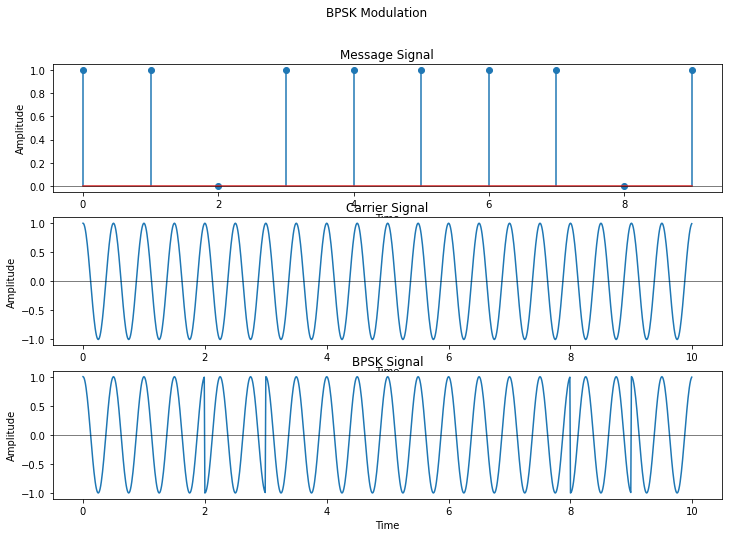

In [5]:
fig, ax = plt.subplots(3, 1, figsize=(12,8))

fig.suptitle('BPSK Modulation')

ax[0].stem(m[0:10])
ax[0].set_title('Message Signal')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[0].axhline(0, color='black', lw=0.5)

ax[1].plot(t[0:1000], carr_wav[0:1000])
ax[1].set_title('Carrier Signal')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Amplitude')
ax[1].axhline(0, color='black', lw=0.5)

ax[2].plot(t[0:1000], bpsk_sig[0:1000])
ax[2].set_title('BPSK Signal')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Amplitude')
ax[2].axhline(0, color='black', lw=0.5)

plt.show()


BPSK DEMODULATION

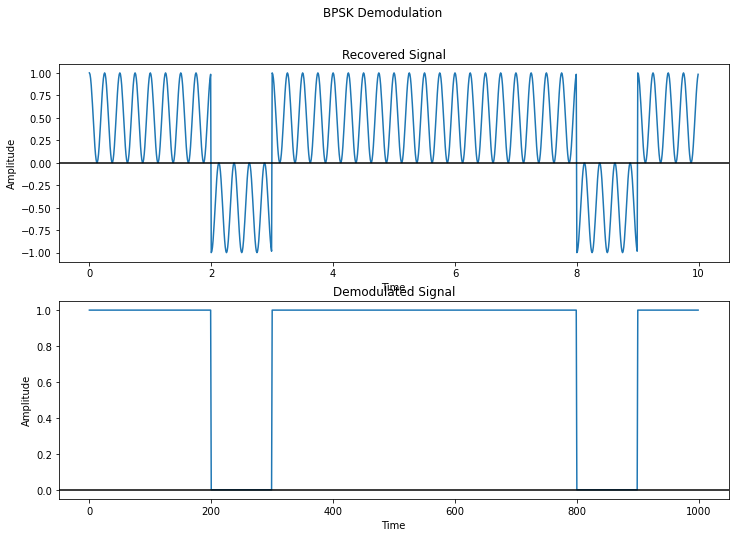

In [6]:
def demod_BPSK(signal,carrier):
    recovered = signal*carrier

    recovered = np.real(recovered)
    demod = []
    for i,j in enumerate(recovered):
        if j > 0:
            demod.append(1)
        elif j < 0:
            demod.append(0)
        else:
            if(j >recovered[i-1]):
                demod.append(1)
            else:
                demod.append(0)

    fig, ax = plt.subplots(2, 1, figsize=(12,8))

    fig.suptitle('BPSK Demodulation')
    ax[0].plot(t[0:1000], recovered[0:1000])
    ax[0].set_title('Recovered Signal')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    ax[0].axhline(y=0, color='Black', linestyle='-')

    ax[1].plot(demod[0:1000])
    ax[1].set_title('Demodulated Signal')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Amplitude')
    ax[1].axhline(y=0, color='Black', linestyle='-')

    
    plt.show()

    return demod

rec = demod_BPSK(bpsk_sig,carr_wav)



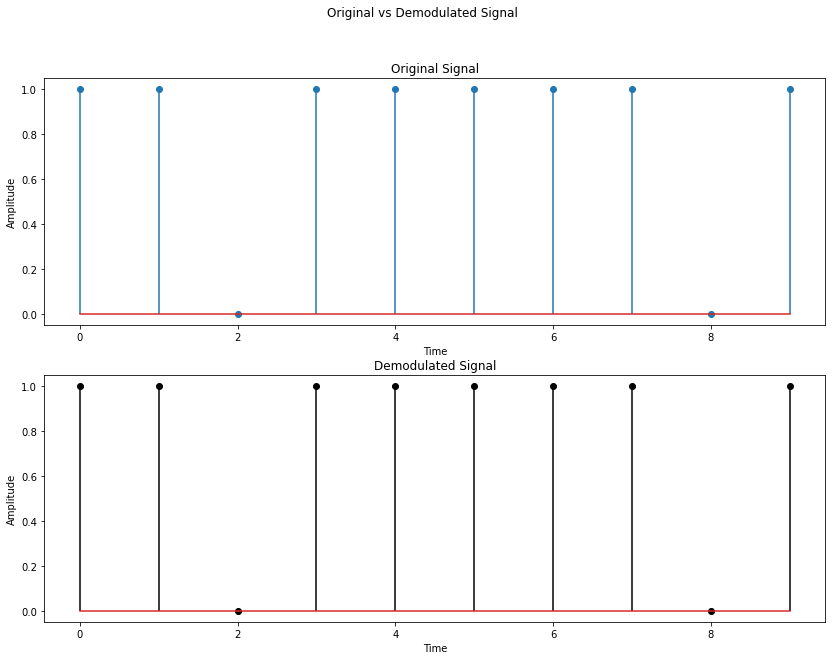

In [11]:
bit_sig = []
for i in range(1000):
    sum = np.sum(rec[i*100:(i+1)*100])
    if sum > 50:
        bit_sig.append(1)
    else:
        bit_sig.append(0)

fig, ax = plt.subplots(2, 1, figsize=(14,10))
fig.suptitle('Original vs Demodulated Signal')
ax[0].stem(m[0:10])
ax[0].set_title('Original Signal')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')

ax[1].stem(bit_sig[0:10] , markerfmt='ko', linefmt='k')
ax[1].set_title('Demodulated Signal')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Amplitude')

plt.show()


BER vs SNR


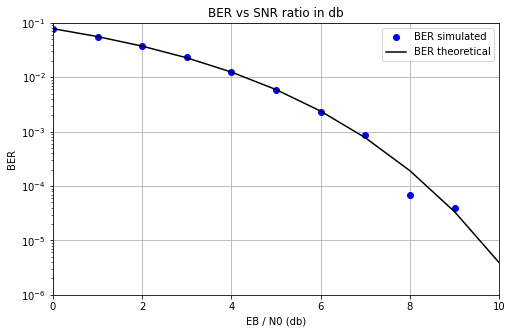

In [8]:
EbN0db = np.arange(0,11)
Nsym = 10 ** 5
BER_sim = np.zeros(len(EbN0db))
random.seed(42)
np.random.seed(42)  
sym = [random.choice([1,0]) for i in range(Nsym)]

NRZop = [1 if sym[i] == 1 else -1 for i in range(Nsym)]
NRZ = np.array(NRZop)

for i, EbN0db1 in enumerate(EbN0db):
    gamma = 10 ** (EbN0db1 / 10)
    P = np.sum(abs(NRZ) ** 2) / len(NRZ)
    N0 = P / gamma
    n = np.sqrt(N0 / 2) * np.random.standard_normal(NRZ.shape)
    r = NRZ + n

    symDetect = np.zeros(len(r))
    for j in range(len(r)):
        if r[j] > 0:
            symDetect[j] = 1
        else:
            symDetect[j] = 0
    BER_sim[i] = np.sum(symDetect != sym) / Nsym

BER_theo = 0.5 * erfc( np.sqrt(10 ** (EbN0db / 10)))

plt.figure(figsize = (8 , 5))
plt.plot(EbN0db, BER_sim, 'bo', label = 'BER simulated')
plt.plot(EbN0db, BER_theo, 'k', label = 'BER theoretical')
plt.axis([0, 10, 1e-6 , 0.1])
plt.legend()
plt.xscale('linear')
plt.yscale('log')
plt.ylabel('BER')
plt.xlabel('EB / N0 (db)')
plt.title('BER vs SNR ratio in db')
plt.grid(True)
plt.show()

